## Bank Customer Churn Prediction

In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import * #(layers, models, optimizers,preprocessing)
from tensorflow.keras.layers import * #(Conv2D, Dense, MaxPooling2D, Flatten, Dropout)
from tensorflow.keras.models import Sequential

In [3]:
bank= pd.read_csv('./Churn_Modelling.csv')
bank.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
bank.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
bank.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
bank.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
bank.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# plot missing values for each variable
#bank.isnull().sum().plot()
#columns= bank.columns
#plt.xticks(np.arange(len(columns)), columns, rotation='vertical')

In [9]:
bank.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

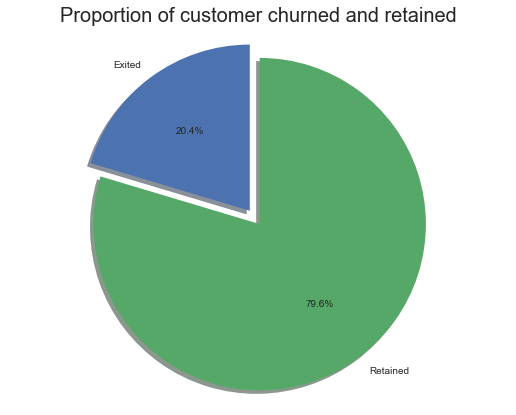

In [10]:
# Exploratory Data analysis
labels= 'Exited', 'Retained'
sizes= [bank.Exited[bank['Exited']==1].count(), 
        bank.Exited[bank['Exited']==0].count()]
explode =(0, 0.1)
fig1, ax1 =plt.subplots(figsize=(9,7))
ax1.pie(sizes, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Proportion of customer churned and retained', size=20)
plt.show()

Text(0.5, 1.0, 'Countplot-Geography Column')

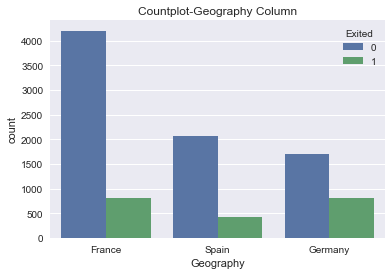

In [11]:
sns.countplot(x='Geography', hue='Exited', data=bank).set_title('Countplot-Geography Column')
#hue 設定標示的名稱

Text(0.5, 1.0, 'Countplot-Gender Column')

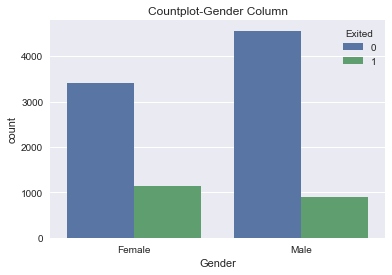

In [12]:
sns.countplot(x='Gender', hue='Exited', data=bank).set_title('Countplot-Gender Column')

Text(0.5, 1.0, 'Countplot-HasCreditCard Column')

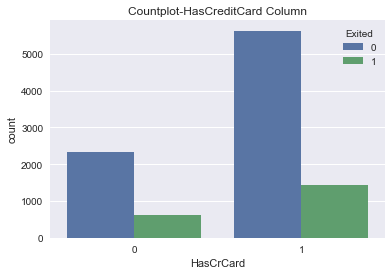

In [13]:
sns.countplot(x='HasCrCard', hue = 'Exited',data = bank).set_title('Countplot-HasCreditCard Column')

Text(0.5, 1.0, 'Countplot-IsActiveMember Column')

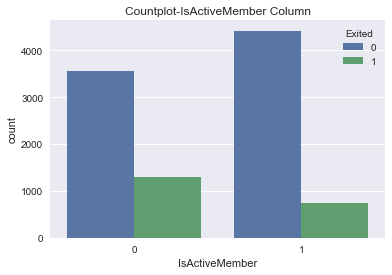

In [14]:
sns.countplot(x='IsActiveMember', hue = 'Exited',data = bank).set_title('Countplot-IsActiveMember Column')

In [15]:
bank.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [16]:
#用不同顏色來定義 high correlation 和 low correlation
def color_negatve_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color= 'red' if val<-0.8 or val>0.8 else 'black'
    return 'color: %s' % color
bank.corr().style.applymap(color_negatve_red)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<AxesSubplot:>

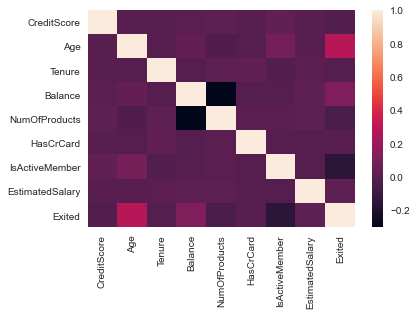

In [17]:
#seaborn作圖
sns.heatmap(bank.corr())

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

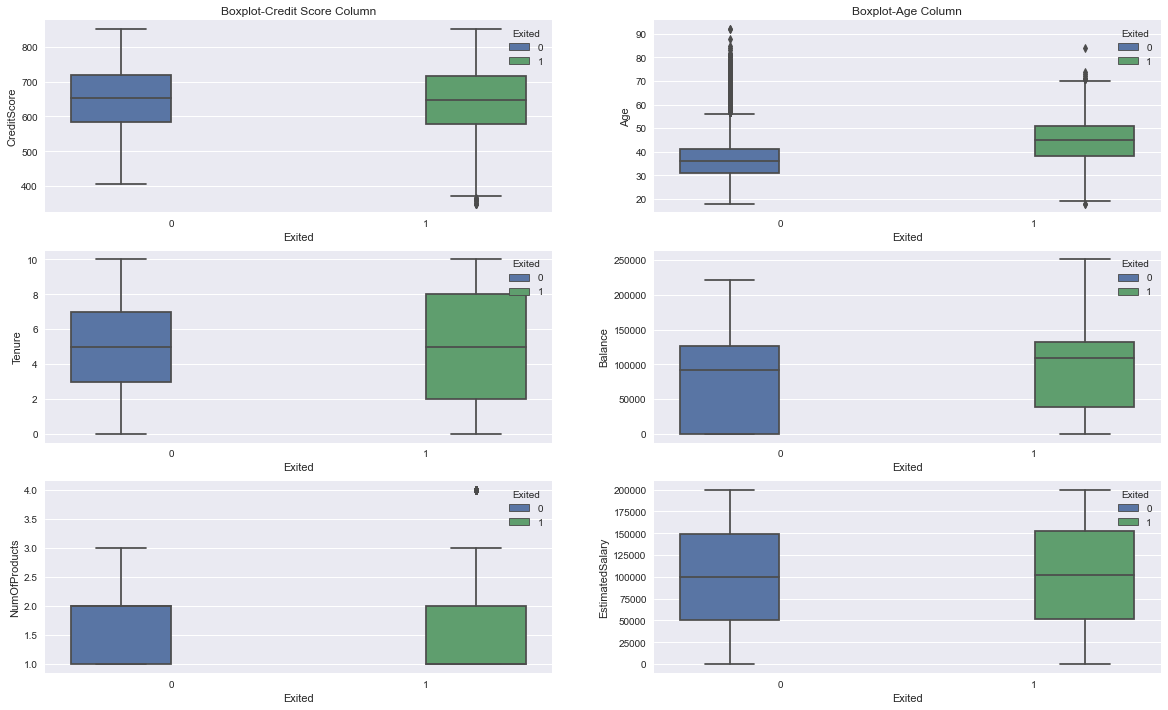

In [18]:
#基於連續變數 製作盒鬚圖
fig, axarr = plt.subplots(3,2, figsize=(20,12))
sns.boxplot(y='CreditScore', x='Exited', 
            hue ='Exited', data= bank, 
            ax=axarr[0][0]).set_title('Boxplot-Credit Score Column')
sns.boxplot(y='Age', x='Exited', 
            hue ='Exited', data= bank, 
            ax=axarr[0][1]).set_title('Boxplot-Age Column')
sns.boxplot(y='Tenure', x='Exited', 
            hue ='Exited', data= bank, 
            ax=axarr[1][0])
sns.boxplot(y='Balance', x='Exited', 
            hue ='Exited', data= bank, 
            ax=axarr[1][1])
sns.boxplot(y='NumOfProducts', x='Exited', 
            hue ='Exited', data= bank, 
            ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary', x='Exited', 
            hue ='Exited', data= bank, 
            ax=axarr[2][1])




(-1.0, 5.0)

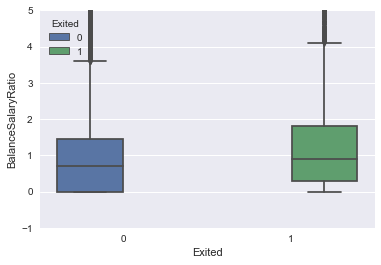

In [19]:
# Feature Engineering
bank['BalanceSalaryRatio']=bank.Balance/bank.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio', x= 'Exited', hue='Exited',
            data=bank)
plt.ylim(-1,5) #設定y軸數值(min,max)

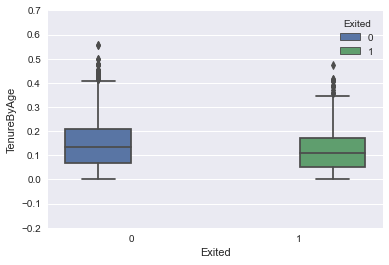

In [20]:
bank['TenureByAge']=bank.Tenure/(bank.Age)
sns.boxplot(y='TenureByAge', x= 'Exited', hue='Exited',
            data=bank)
plt.ylim(-0.2, 0.7)
plt.show()

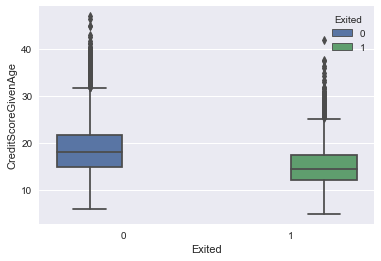

In [21]:
bank['CreditScoreGivenAge'] = bank.CreditScore/(bank.Age)
sns.boxplot(y='CreditScoreGivenAge',x = 'Exited', hue = 'Exited',
            data = bank)
plt.show()

In [22]:
#Data Preparation for the Model fitting

#連續變量
continuous_vars=['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts',
                 'EstimatedSalary', 'BalanceSalaryRatio','TenureByAge','CreditScoreGivenAge']
#絕對變量
categorical_vars=['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df=bank[['Exited']+continuous_vars+categorical_vars]
df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,0,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,0,France,Female
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,0,0,France,Female
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,Spain,Female


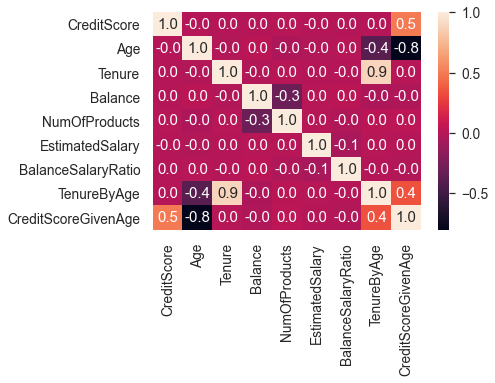

In [23]:
sns.set()
sns.set(font_scale = 1.25)
sns.heatmap(df[continuous_vars].corr(), annot = True,fmt = ".1f")
plt.show()

In [24]:
'''
Changing values of column HasCrCard and IsActiveMember from 0 to -1 
so that they will influence negatively to the model instead of no effect.
'''
df.loc[df.HasCrCard == 0, 'HasCrCard'] = -1
df.loc[df.IsActiveMember == 0, 'IsActiveMember'] = -1
df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,France,Female
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,Spain,Female
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,France,Female
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,France,Female
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,Spain,Female


In [25]:
# 建立One-hot encoding categorical columns
print (df['Gender'].unique())
print (df['Geography'].unique())

['Female' 'Male']
['France' 'Spain' 'Germany']


In [26]:
from sklearn.preprocessing import LabelEncoder 
label=LabelEncoder()
df['Gender']=label.fit_transform(df['Gender'])
df['Geography']=label.fit_transform(df['Geography'])
df.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,0,0
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,2,0
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,0,0
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,0,0
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,2,0


In [27]:
df1 = pd.get_dummies(data=df, columns=['Gender','Geography'])
df1.columns


Index(['Exited', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'BalanceSalaryRatio', 'TenureByAge',
       'CreditScoreGivenAge', 'HasCrCard', 'IsActiveMember', 'Gender_0',
       'Gender_1', 'Geography_0', 'Geography_1', 'Geography_2'],
      dtype='object')

In [28]:
df1.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Gender_0,Gender_1,Geography_0,Geography_1,Geography_2
0,1,619,42,2,0.00,1,101348.88,0.000000,0.047619,14.738095,1,1,1,0,1,0,0
1,0,608,41,1,83807.86,1,112542.58,0.744677,0.024390,14.829268,-1,1,1,0,0,0,1
2,1,502,42,8,159660.80,3,113931.57,1.401375,0.190476,11.952381,1,-1,1,0,1,0,0
3,0,699,39,1,0.00,2,93826.63,0.000000,0.025641,17.923077,-1,-1,1,0,1,0,0
4,0,850,43,2,125510.82,1,79084.10,1.587055,0.046512,19.767442,1,1,1,0,0,0,1


In [29]:
continuous_vars

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'BalanceSalaryRatio',
 'TenureByAge',
 'CreditScoreGivenAge']

In [30]:
#標準化 (使用minmaxsclar)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1[continuous_vars]=scaler.fit_transform(df1[continuous_vars])

In [31]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

Exited: [1 0]
CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0


Age: [0.32432432 0.31081081 0.28378378 0.33783784 0.35135135 0.43243243
 0.14864865 0.12162162 0.17567568 0.08108108 0.21621622 0.09459459
 0.22972973 0.36486486 0.54054054 0.18918919 0.27027027 0.37837838
 0.24324324 0.2027027  0.2972973  0.44594595 0.58108108 0.41891892
 0.25675676 0.01351351 0.64864865 0.51351351 0.10810811 0.04054054
 0.5        0.77027027 0.05405405 0.16216216 0.13513514 0.63513514
 0.40540541 0.45945946 0.52702703 0.74324324 0.39189189 0.48648649
 0.72972973 0.02702703 0.66216216 0.82432432 0.59459459 0.47297297
 0.83783784 0.55405405 0.67567568 0.06756757 0.56756757 0.7027027
 0.60810811 0.62162162 0.         0.86486486 0.68918919 0.75675676
 0.71621622 0.78378378 0.7972973  0.94594595 0.90540541 0.89189189
 0.81081081 0.85135135 1.         0.87837838]
Tenure: [0.2 0.1 0.8 0.7 0.4 0.6 0.3 1.  0.5 0.9 0. ]
Balance: [0.         0.33403148 0.63635718 ... 0.22865702 0.29922631 0.51870777]
NumOfProducts: [0.         0.66666667 0.33333333 1.        ]
EstimatedSalary:

In [32]:
# Model fitting and selection

# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [33]:
#分群 training
X= df1.drop('Exited', axis='columns')
y= df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 16), (2000, 16), (8000,), (2000,))

In [34]:
# Logistic Regression
logreg= LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log= round(logreg.score(X_test, y_test)*100,2)
acc_log

81.4

In [35]:
#準確率
print('accuracy={:.2f}\n'.format(accuracy_score(y_test, y_pred)*100))

accuracy=81.40



In [36]:
# SVM
svc =SVC()
svc.fit(X_train, y_train)
y_pred1=svc.predict(X_test)
acc_svc=round(svc.score(X_test,y_test)*100,2)
acc_svc

82.75

In [37]:
#準確率
print('accuracy={:.2f}\n'.format(accuracy_score(y_test, y_pred1)*100))

accuracy=82.75



In [38]:
# knn
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred2=knn.predict(X_test)
acc_knn= round(knn.score(X_test,y_test)*100,2)
acc_knn

79.4

In [39]:
#準確率
print('accuracy={:.2f}\n'.format(accuracy_score(y_test, y_pred2)*100))

accuracy=79.40



In [40]:
# Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred3 = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
print('accuracy={:.2f}\n'.format(accuracy_score(y_test, y_pred3)*100))

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred4 = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
print('accuracy={:.2f}\n'.format(accuracy_score(y_test, y_pred4)*100))

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred5 = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
print('accuracy={:.2f}\n'.format(accuracy_score(y_test, y_pred5)*100))

#XGBoost ( Extreme Gradient Boosting )
XGB= XGBClassifier(base_score=0.5,  booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=5,
                    min_child_weight=1, missing=None, n_estimators=100,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, subsample=1)
XGB.fit(X_train,y_train)
y_pred6 = XGB.predict(X_test)
acc_XGB= round(XGB.score(X_test,y_test)*100, 2)
print('accuracy={:.2f}\n'.format(accuracy_score(y_test, y_pred6)*100))

accuracy=80.95

accuracy=78.65



accuracy=85.15

[12:29:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


accuracy=85.90



In [41]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Decision Tree', 'XGBoots'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_decision_tree, acc_XGB]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,XGBoots,85.90
3,Random Forest,85.15
0,Support Vector Machines,82.75
2,Logistic Regression,81.40
4,Naive Bayes,80.95
1,KNN,79.40
5,Decision Tree,78.65


In [42]:
from sklearn.metrics import classification_report
'''
print('\033[1m'+"輸入文字") 粗體字
print('\033[1;34m'____文字_____) 34m 指顏色代碼
'''
print("-"*60)
print('\033[1m' + '\033[1;34m Logistic Regression \033[0m:')
print(classification_report(y_test, y_pred))
print("-"*60)
print('\033[1m' + '\033[1;34m SVM \033[0m:') 
print(classification_report(y_test, y_pred1))
print("-"*60)
print('\033[1m' + '\033[1;34m KNN \033[0m:') 
print(classification_report(y_test, y_pred2))
print("-"*60)
print('\033[1m' + '\033[1;34m Naive Bayes \033[0m:') 
print(classification_report(y_test, y_pred3))
print("-"*60)
print('\033[1m' + '\033[1;34m Decision Tree \033[0m:') 
print(classification_report(y_test, y_pred4))
print("-"*60)
print('\033[1m' + '\033[1;34m Random Forest \033[0m:') 
print(classification_report(y_test, y_pred5))
print("-"*60)
print('\033[1m' + '\033[1;34m XGBoost ( Extreme Gradient Boosting ) \033[0m:') 
print(classification_report(y_test, y_pred6))

------------------------------------------------------------
 Logistic Regression :
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1595
           1       0.63      0.20      0.30       405

    accuracy                           0.81      2000
   macro avg       0.73      0.58      0.60      2000
weighted avg       0.79      0.81      0.77      2000

------------------------------------------------------------
 SVM :
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1595
           1       0.78      0.20      0.32       405

    accuracy                           0.83      2000
   macro avg       0.81      0.60      0.61      2000
weighted avg       0.82      0.83      0.78      2000

------------------------------------------------------------
 KNN :
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1595
           1     

In [43]:
#Using Artificial Neural Network technique
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

In [44]:
model= Sequential()

# first hidden layer
model.add(Dense(8, activation='relu', input_dim=16))
model.add(Dropout(0.1))

# second hidden layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))

# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
train_history=model.fit(X_train, y_train, batch_size = 10, epochs = 50)

Epoch 1/50


  1/800 [..............................] - ETA: 0s - loss: 0.6487 - accuracy: 0.6000

 59/800 [=>............................] - ETA: 0s - loss: 0.5845 - accuracy: 0.7424

121/800 [===>..........................] - ETA: 0s - loss: 0.5560 - accuracy: 0.7702

180/800 [=====>........................] - ETA: 0s - loss: 0.5403 - accuracy: 0.7772



240/800 [========>.....................] - ETA: 0s - loss: 0.5318 - accuracy: 0.7767

301/800 [==========>...................] - ETA: 0s - loss: 0.5264 - accuracy: 0.7794

361/800 [============>.................] - ETA: 0s - loss: 0.5174 - accuracy: 0.7837



418/800 [==============>...............] - ETA: 0s - loss: 0.5112 - accuracy: 0.7856



482/800 [=================>............] - ETA: 0s - loss: 0.5043 - accuracy: 0.7871

542/800 [===================>..........] - ETA: 0s - loss: 0.5007 - accuracy: 0.7886

605/800 [=====================>........] - ETA: 0s - loss: 0.5028 - accuracy: 0.7878



664/800 [=======================>......] - ETA: 0s - loss: 0.4985 - accuracy: 0.7914

719/800 [=========================>....] - ETA: 0s - loss: 0.4963 - accuracy: 0.7929



773/800 [===========================>..] - ETA: 0s - loss: 0.4959 - accuracy: 0.7922

800/800 [==============================] - 1s 846us/step - loss: 0.4957 - accuracy: 0.7925


Epoch 2/50


  1/800 [..............................] - ETA: 0s - loss: 0.1951 - accuracy: 1.0000



 64/800 [=>............................] - ETA: 0s - loss: 0.4957 - accuracy: 0.7891



121/800 [===>..........................] - ETA: 0s - loss: 0.4875 - accuracy: 0.7909

184/800 [=====>........................] - ETA: 0s - loss: 0.4949 - accuracy: 0.7837

246/800 [========>.....................] - ETA: 0s - loss: 0.4878 - accuracy: 0.7870



307/800 [==========>...................] - ETA: 0s - loss: 0.4828 - accuracy: 0.7925



369/800 [============>.................] - ETA: 0s - loss: 0.4754 - accuracy: 0.7967

433/800 [===============>..............] - ETA: 0s - loss: 0.4740 - accuracy: 0.7977

493/800 [=================>............] - ETA: 0s - loss: 0.4749 - accuracy: 0.7959



555/800 [===================>..........] - ETA: 0s - loss: 0.4688 - accuracy: 0.7980



618/800 [======================>.......] - ETA: 0s - loss: 0.4716 - accuracy: 0.7950



679/800 [========================>.....] - ETA: 0s - loss: 0.4693 - accuracy: 0.7962

742/800 [==========================>...] - ETA: 0s - loss: 0.4675 - accuracy: 0.7969

800/800 [==============================] - 1s 812us/step - loss: 0.4686 - accuracy: 0.7960


Epoch 3/50
  1/800 [..............................] - ETA: 0s - loss: 0.3239 - accuracy: 0.8000



 60/800 [=>............................] - ETA: 0s - loss: 0.4511 - accuracy: 0.7950



120/800 [===>..........................] - ETA: 0s - loss: 0.4546 - accuracy: 0.7900



179/800 [=====>........................] - ETA: 0s - loss: 0.4638 - accuracy: 0.7911



232/800 [=======>......................] - ETA: 0s - loss: 0.4614 - accuracy: 0.7935



287/800 [=========>....................] - ETA: 0s - loss: 0.4604 - accuracy: 0.7923



349/800 [============>.................] - ETA: 0s - loss: 0.4606 - accuracy: 0.7923



401/800 [==============>...............] - ETA: 0s - loss: 0.4608 - accuracy: 0.7925

459/800 [================>.............] - ETA: 0s - loss: 0.4639 - accuracy: 0.7932



516/800 [==================>...........] - ETA: 0s - loss: 0.4588 - accuracy: 0.7955



571/800 [====================>.........] - ETA: 0s - loss: 0.4602 - accuracy: 0.7967



631/800 [======================>.......] - ETA: 0s - loss: 0.4608 - accuracy: 0.7967



694/800 [=========================>....] - ETA: 0s - loss: 0.4598 - accuracy: 0.7968



757/800 [===========================>..] - ETA: 0s - loss: 0.4589 - accuracy: 0.7968

800/800 [==============================] - 1s 857us/step - loss: 0.4609 - accuracy: 0.7960


Epoch 4/50


  1/800 [..............................] - ETA: 0s - loss: 0.4129 - accuracy: 0.9000



 62/800 [=>............................] - ETA: 0s - loss: 0.4148 - accuracy: 0.8290



124/800 [===>..........................] - ETA: 0s - loss: 0.4411 - accuracy: 0.8113



187/800 [======>.......................] - ETA: 0s - loss: 0.4501 - accuracy: 0.8032

249/800 [========>.....................] - ETA: 0s - loss: 0.4460 - accuracy: 0.8044



310/800 [==========>...................] - ETA: 0s - loss: 0.4486 - accuracy: 0.8026



371/800 [============>.................] - ETA: 0s - loss: 0.4486 - accuracy: 0.8030



431/800 [===============>..............] - ETA: 0s - loss: 0.4510 - accuracy: 0.8009



489/800 [=================>............] - ETA: 0s - loss: 0.4522 - accuracy: 0.8000



549/800 [===================>..........] - ETA: 0s - loss: 0.4492 - accuracy: 0.7995



609/800 [=====================>........] - ETA: 0s - loss: 0.4467 - accuracy: 0.7995

669/800 [========================>.....] - ETA: 0s - loss: 0.4491 - accuracy: 0.7973

729/800 [==========================>...] - ETA: 0s - loss: 0.4509 - accuracy: 0.7967



788/800 [============================>.] - ETA: 0s - loss: 0.4501 - accuracy: 0.7962

800/800 [==============================] - 1s 828us/step - loss: 0.4502 - accuracy: 0.7964


Epoch 5/50
  1/800 [..............................] - ETA: 0s - loss: 0.3312 - accuracy: 0.9000



 57/800 [=>............................] - ETA: 0s - loss: 0.4550 - accuracy: 0.7947

109/800 [===>..........................] - ETA: 0s - loss: 0.4549 - accuracy: 0.7982

170/800 [=====>........................] - ETA: 0s - loss: 0.4603 - accuracy: 0.7953

222/800 [=======>......................] - ETA: 0s - loss: 0.4665 - accuracy: 0.7892



279/800 [=========>....................] - ETA: 0s - loss: 0.4577 - accuracy: 0.7939



336/800 [===========>..................] - ETA: 0s - loss: 0.4480 - accuracy: 0.7985



395/800 [=============>................] - ETA: 0s - loss: 0.4447 - accuracy: 0.7997

454/800 [================>.............] - ETA: 0s - loss: 0.4486 - accuracy: 0.7993

513/800 [==================>...........] - ETA: 0s - loss: 0.4444 - accuracy: 0.8010



570/800 [====================>.........] - ETA: 0s - loss: 0.4371 - accuracy: 0.8049



627/800 [======================>.......] - ETA: 0s - loss: 0.4393 - accuracy: 0.8040



684/800 [========================>.....] - ETA: 0s - loss: 0.4371 - accuracy: 0.8050



744/800 [==========================>...] - ETA: 0s - loss: 0.4365 - accuracy: 0.8059



800/800 [==============================] - 1s 873us/step - loss: 0.4410 - accuracy: 0.8037


Epoch 6/50
  1/800 [..............................] - ETA: 0s - loss: 0.2299 - accuracy: 1.0000

 57/800 [=>............................] - ETA: 0s - loss: 0.4374 - accuracy: 0.8105



112/800 [===>..........................] - ETA: 0s - loss: 0.4317 - accuracy: 0.8098



169/800 [=====>........................] - ETA: 0s - loss: 0.4252 - accuracy: 0.8195



230/800 [=======>......................] - ETA: 0s - loss: 0.4292 - accuracy: 0.8170



292/800 [=========>....................] - ETA: 0s - loss: 0.4387 - accuracy: 0.8068



350/800 [============>.................] - ETA: 0s - loss: 0.4351 - accuracy: 0.8086

411/800 [==============>...............] - ETA: 0s - loss: 0.4460 - accuracy: 0.8022



465/800 [================>.............] - ETA: 0s - loss: 0.4396 - accuracy: 0.8058



515/800 [==================>...........] - ETA: 0s - loss: 0.4389 - accuracy: 0.8068



573/800 [====================>.........] - ETA: 0s - loss: 0.4405 - accuracy: 0.8056



635/800 [======================>.......] - ETA: 0s - loss: 0.4381 - accuracy: 0.8071

695/800 [=========================>....] - ETA: 0s - loss: 0.4338 - accuracy: 0.8117



756/800 [===========================>..] - ETA: 0s - loss: 0.4308 - accuracy: 0.8123



800/800 [==============================] - 1s 861us/step - loss: 0.4316 - accuracy: 0.8117


Epoch 7/50
  1/800 [..............................] - ETA: 0s - loss: 0.3262 - accuracy: 0.8000



 61/800 [=>............................] - ETA: 0s - loss: 0.4281 - accuracy: 0.7967



120/800 [===>..........................] - ETA: 0s - loss: 0.4281 - accuracy: 0.8017



182/800 [=====>........................] - ETA: 0s - loss: 0.4282 - accuracy: 0.8099



242/800 [========>.....................] - ETA: 0s - loss: 0.4339 - accuracy: 0.8120



302/800 [==========>...................] - ETA: 0s - loss: 0.4387 - accuracy: 0.8099

363/800 [============>.................] - ETA: 0s - loss: 0.4301 - accuracy: 0.8146



418/800 [==============>...............] - ETA: 0s - loss: 0.4285 - accuracy: 0.8151



467/800 [================>.............] - ETA: 0s - loss: 0.4265 - accuracy: 0.8173



514/800 [==================>...........] - ETA: 0s - loss: 0.4284 - accuracy: 0.8148



563/800 [====================>.........] - ETA: 0s - loss: 0.4274 - accuracy: 0.8160



616/800 [======================>.......] - ETA: 0s - loss: 0.4247 - accuracy: 0.8166



672/800 [========================>.....] - ETA: 0s - loss: 0.4232 - accuracy: 0.8176



728/800 [==========================>...] - ETA: 0s - loss: 0.4255 - accuracy: 0.8161



780/800 [============================>.] - ETA: 0s - loss: 0.4262 - accuracy: 0.8155

800/800 [==============================] - 1s 904us/step - loss: 0.4276 - accuracy: 0.8155


Epoch 8/50
  1/800 [..............................] - ETA: 0s - loss: 0.6367 - accuracy: 0.6000

 61/800 [=>............................] - ETA: 0s - loss: 0.4294 - accuracy: 0.8148

111/800 [===>..........................] - ETA: 0s - loss: 0.4219 - accuracy: 0.8189



169/800 [=====>........................] - ETA: 0s - loss: 0.4136 - accuracy: 0.8260



230/800 [=======>......................] - ETA: 0s - loss: 0.4302 - accuracy: 0.8161



287/800 [=========>....................] - ETA: 0s - loss: 0.4307 - accuracy: 0.8146



348/800 [============>.................] - ETA: 0s - loss: 0.4321 - accuracy: 0.8141



401/800 [==============>...............] - ETA: 0s - loss: 0.4308 - accuracy: 0.8160

454/800 [================>.............] - ETA: 0s - loss: 0.4241 - accuracy: 0.8189

512/800 [==================>...........] - ETA: 0s - loss: 0.4283 - accuracy: 0.8168



568/800 [====================>.........] - ETA: 0s - loss: 0.4274 - accuracy: 0.8185



623/800 [======================>.......] - ETA: 0s - loss: 0.4235 - accuracy: 0.8204



679/800 [========================>.....] - ETA: 0s - loss: 0.4219 - accuracy: 0.8215

733/800 [==========================>...] - ETA: 0s - loss: 0.4225 - accuracy: 0.8201

791/800 [============================>.] - ETA: 0s - loss: 0.4229 - accuracy: 0.8198

800/800 [==============================] - 1s 888us/step - loss: 0.4224 - accuracy: 0.8200


Epoch 9/50
  1/800 [..............................] - ETA: 0s - loss: 0.6311 - accuracy: 0.6000

 59/800 [=>............................] - ETA: 0s - loss: 0.4086 - accuracy: 0.8356

119/800 [===>..........................] - ETA: 0s - loss: 0.4154 - accuracy: 0.8227



179/800 [=====>........................] - ETA: 0s - loss: 0.4103 - accuracy: 0.8279



241/800 [========>.....................] - ETA: 0s - loss: 0.4123 - accuracy: 0.8311

298/800 [==========>...................] - ETA: 0s - loss: 0.4094 - accuracy: 0.8319

357/800 [============>.................] - ETA: 0s - loss: 0.4092 - accuracy: 0.8308

415/800 [==============>...............] - ETA: 0s - loss: 0.4160 - accuracy: 0.8248



476/800 [================>.............] - ETA: 0s - loss: 0.4135 - accuracy: 0.8256



528/800 [==================>...........] - ETA: 0s - loss: 0.4133 - accuracy: 0.8265



586/800 [====================>.........] - ETA: 0s - loss: 0.4157 - accuracy: 0.8251



646/800 [=======================>......] - ETA: 0s - loss: 0.4152 - accuracy: 0.8257

704/800 [=========================>....] - ETA: 0s - loss: 0.4153 - accuracy: 0.8256



763/800 [===========================>..] - ETA: 0s - loss: 0.4127 - accuracy: 0.8249

800/800 [==============================] - 1s 852us/step - loss: 0.4123 - accuracy: 0.8239


Epoch 10/50


  1/800 [..............................] - ETA: 0s - loss: 0.5793 - accuracy: 0.7000



 62/800 [=>............................] - ETA: 0s - loss: 0.4587 - accuracy: 0.8065



113/800 [===>..........................] - ETA: 0s - loss: 0.4366 - accuracy: 0.8204



161/800 [=====>........................] - ETA: 0s - loss: 0.4211 - accuracy: 0.8280

212/800 [======>.......................] - ETA: 0s - loss: 0.4162 - accuracy: 0.8283



261/800 [========>.....................] - ETA: 0s - loss: 0.4121 - accuracy: 0.8287



310/800 [==========>...................] - ETA: 0s - loss: 0.4132 - accuracy: 0.8277



357/800 [============>.................] - ETA: 0s - loss: 0.4187 - accuracy: 0.8235



404/800 [==============>...............] - ETA: 0s - loss: 0.4207 - accuracy: 0.8208



456/800 [================>.............] - ETA: 0s - loss: 0.4181 - accuracy: 0.8208

518/800 [==================>...........] - ETA: 0s - loss: 0.4185 - accuracy: 0.8232



578/800 [====================>.........] - ETA: 0s - loss: 0.4145 - accuracy: 0.8237



633/800 [======================>.......] - ETA: 0s - loss: 0.4171 - accuracy: 0.8221



691/800 [========================>.....] - ETA: 0s - loss: 0.4169 - accuracy: 0.8214



752/800 [===========================>..] - ETA: 0s - loss: 0.4184 - accuracy: 0.8213



800/800 [==============================] - 1s 932us/step - loss: 0.4157 - accuracy: 0.8232


Epoch 11/50
  1/800 [..............................] - ETA: 0s - loss: 0.1242 - accuracy: 1.0000



 61/800 [=>............................] - ETA: 0s - loss: 0.4158 - accuracy: 0.8262



111/800 [===>..........................] - ETA: 0s - loss: 0.4104 - accuracy: 0.8351



169/800 [=====>........................] - ETA: 0s - loss: 0.4111 - accuracy: 0.8385



230/800 [=======>......................] - ETA: 0s - loss: 0.4100 - accuracy: 0.8357



290/800 [=========>....................] - ETA: 0s - loss: 0.4093 - accuracy: 0.8355



349/800 [============>.................] - ETA: 0s - loss: 0.4081 - accuracy: 0.8355

407/800 [==============>...............] - ETA: 0s - loss: 0.4133 - accuracy: 0.8302

469/800 [================>.............] - ETA: 0s - loss: 0.4119 - accuracy: 0.8303



532/800 [==================>...........] - ETA: 0s - loss: 0.4127 - accuracy: 0.8269



591/800 [=====================>........] - ETA: 0s - loss: 0.4140 - accuracy: 0.8255



649/800 [=======================>......] - ETA: 0s - loss: 0.4152 - accuracy: 0.8257



706/800 [=========================>....] - ETA: 0s - loss: 0.4128 - accuracy: 0.8286

764/800 [===========================>..] - ETA: 0s - loss: 0.4136 - accuracy: 0.8279

800/800 [==============================] - 1s 859us/step - loss: 0.4127 - accuracy: 0.8288


Epoch 12/50
  1/800 [..............................] - ETA: 0s - loss: 0.4209 - accuracy: 0.9000



 57/800 [=>............................] - ETA: 0s - loss: 0.4354 - accuracy: 0.8263



114/800 [===>..........................] - ETA: 0s - loss: 0.4153 - accuracy: 0.8333



167/800 [=====>........................] - ETA: 0s - loss: 0.4239 - accuracy: 0.8293

222/800 [=======>......................] - ETA: 0s - loss: 0.4289 - accuracy: 0.8248



274/800 [=========>....................] - ETA: 0s - loss: 0.4230 - accuracy: 0.8241



329/800 [===========>..................] - ETA: 0s - loss: 0.4216 - accuracy: 0.8240



386/800 [=============>................] - ETA: 0s - loss: 0.4234 - accuracy: 0.8231



442/800 [===============>..............] - ETA: 0s - loss: 0.4271 - accuracy: 0.8206

493/800 [=================>............] - ETA: 0s - loss: 0.4260 - accuracy: 0.8223



543/800 [===================>..........] - ETA: 0s - loss: 0.4281 - accuracy: 0.8219



598/800 [=====================>........] - ETA: 0s - loss: 0.4251 - accuracy: 0.8242



654/800 [=======================>......] - ETA: 0s - loss: 0.4234 - accuracy: 0.8249



708/800 [=========================>....] - ETA: 0s - loss: 0.4194 - accuracy: 0.8273

765/800 [===========================>..] - ETA: 0s - loss: 0.4134 - accuracy: 0.8305

800/800 [==============================] - 1s 913us/step - loss: 0.4136 - accuracy: 0.8299


Epoch 13/50
  1/800 [..............................] - ETA: 0s - loss: 0.4018 - accuracy: 0.9000



 62/800 [=>............................] - ETA: 0s - loss: 0.4073 - accuracy: 0.8339



121/800 [===>..........................] - ETA: 0s - loss: 0.3931 - accuracy: 0.8372

181/800 [=====>........................] - ETA: 0s - loss: 0.3957 - accuracy: 0.8348

241/800 [========>.....................] - ETA: 0s - loss: 0.4082 - accuracy: 0.8257

301/800 [==========>...................] - ETA: 0s - loss: 0.4077 - accuracy: 0.8252



355/800 [============>.................] - ETA: 0s - loss: 0.4145 - accuracy: 0.8223



416/800 [==============>...............] - ETA: 0s - loss: 0.4081 - accuracy: 0.8269



472/800 [================>.............] - ETA: 0s - loss: 0.4101 - accuracy: 0.8261



532/800 [==================>...........] - ETA: 0s - loss: 0.4092 - accuracy: 0.8256



590/800 [=====================>........] - ETA: 0s - loss: 0.4092 - accuracy: 0.8271



648/800 [=======================>......] - ETA: 0s - loss: 0.4085 - accuracy: 0.8276



702/800 [=========================>....] - ETA: 0s - loss: 0.4084 - accuracy: 0.8268



760/800 [===========================>..] - ETA: 0s - loss: 0.4048 - accuracy: 0.8291



800/800 [==============================] - 1s 857us/step - loss: 0.4043 - accuracy: 0.8304


Epoch 14/50
  1/800 [..............................] - ETA: 0s - loss: 0.3647 - accuracy: 0.9000



 46/800 [>.............................] - ETA: 0s - loss: 0.3930 - accuracy: 0.8261



 88/800 [==>...........................] - ETA: 0s - loss: 0.3981 - accuracy: 0.8295

137/800 [====>.........................] - ETA: 0s - loss: 0.4032 - accuracy: 0.8314

198/800 [======>.......................] - ETA: 0s - loss: 0.4068 - accuracy: 0.8308

255/800 [========>.....................] - ETA: 0s - loss: 0.4038 - accuracy: 0.8345



316/800 [==========>...................] - ETA: 0s - loss: 0.4017 - accuracy: 0.8345



377/800 [=============>................] - ETA: 0s - loss: 0.4045 - accuracy: 0.8326



438/800 [===============>..............] - ETA: 0s - loss: 0.4024 - accuracy: 0.8349



499/800 [=================>............] - ETA: 0s - loss: 0.4116 - accuracy: 0.8291

560/800 [====================>.........] - ETA: 0s - loss: 0.4077 - accuracy: 0.8313

609/800 [=====================>........] - ETA: 0s - loss: 0.4089 - accuracy: 0.8310



667/800 [========================>.....] - ETA: 0s - loss: 0.4084 - accuracy: 0.8319



728/800 [==========================>...] - ETA: 0s - loss: 0.4082 - accuracy: 0.8313



786/800 [============================>.] - ETA: 0s - loss: 0.4100 - accuracy: 0.8303

800/800 [==============================] - 1s 891us/step - loss: 0.4095 - accuracy: 0.8299


Epoch 15/50
  1/800 [..............................] - ETA: 0s - loss: 0.3031 - accuracy: 0.9000

 61/800 [=>............................] - ETA: 0s - loss: 0.3953 - accuracy: 0.8311

120/800 [===>..........................] - ETA: 0s - loss: 0.3951 - accuracy: 0.8325

180/800 [=====>........................] - ETA: 0s - loss: 0.4059 - accuracy: 0.8300



242/800 [========>.....................] - ETA: 0s - loss: 0.4101 - accuracy: 0.8289



301/800 [==========>...................] - ETA: 0s - loss: 0.4127 - accuracy: 0.8279



363/800 [============>.................] - ETA: 0s - loss: 0.4087 - accuracy: 0.8273

419/800 [==============>...............] - ETA: 0s - loss: 0.4061 - accuracy: 0.8296



479/800 [================>.............] - ETA: 0s - loss: 0.4092 - accuracy: 0.8257



537/800 [===================>..........] - ETA: 0s - loss: 0.4075 - accuracy: 0.8266



586/800 [====================>.........] - ETA: 0s - loss: 0.4069 - accuracy: 0.8273



644/800 [=======================>......] - ETA: 0s - loss: 0.4083 - accuracy: 0.8264



705/800 [=========================>....] - ETA: 0s - loss: 0.4080 - accuracy: 0.8268



765/800 [===========================>..] - ETA: 0s - loss: 0.4069 - accuracy: 0.8271

800/800 [==============================] - 1s 853us/step - loss: 0.4086 - accuracy: 0.8253


Epoch 16/50


  1/800 [..............................] - ETA: 0s - loss: 0.2923 - accuracy: 0.8000



 63/800 [=>............................] - ETA: 0s - loss: 0.3787 - accuracy: 0.8349



123/800 [===>..........................] - ETA: 0s - loss: 0.3927 - accuracy: 0.8236



182/800 [=====>........................] - ETA: 0s - loss: 0.3867 - accuracy: 0.8346

238/800 [=======>......................] - ETA: 0s - loss: 0.3969 - accuracy: 0.8286



300/800 [==========>...................] - ETA: 0s - loss: 0.4006 - accuracy: 0.8283



359/800 [============>.................] - ETA: 0s - loss: 0.4034 - accuracy: 0.8270



419/800 [==============>...............] - ETA: 0s - loss: 0.4046 - accuracy: 0.8267



480/800 [=================>............] - ETA: 0s - loss: 0.4094 - accuracy: 0.8242



541/800 [===================>..........] - ETA: 0s - loss: 0.4100 - accuracy: 0.8246



600/800 [=====================>........] - ETA: 0s - loss: 0.4093 - accuracy: 0.8250

662/800 [=======================>......] - ETA: 0s - loss: 0.4085 - accuracy: 0.8260

724/800 [==========================>...] - ETA: 0s - loss: 0.4082 - accuracy: 0.8278



784/800 [============================>.] - ETA: 0s - loss: 0.4085 - accuracy: 0.8274

800/800 [==============================] - 1s 832us/step - loss: 0.4070 - accuracy: 0.8288


Epoch 17/50
  1/800 [..............................] - ETA: 0s - loss: 0.2088 - accuracy: 1.0000

 61/800 [=>............................] - ETA: 0s - loss: 0.4106 - accuracy: 0.8361

121/800 [===>..........................] - ETA: 0s - loss: 0.4129 - accuracy: 0.8372

184/800 [=====>........................] - ETA: 0s - loss: 0.4041 - accuracy: 0.8397

237/800 [=======>......................] - ETA: 0s - loss: 0.4095 - accuracy: 0.8363



294/800 [==========>...................] - ETA: 0s - loss: 0.4084 - accuracy: 0.8354



356/800 [============>.................] - ETA: 0s - loss: 0.4112 - accuracy: 0.8312

409/800 [==============>...............] - ETA: 0s - loss: 0.4064 - accuracy: 0.8342



471/800 [================>.............] - ETA: 0s - loss: 0.4093 - accuracy: 0.8329



530/800 [==================>...........] - ETA: 0s - loss: 0.4116 - accuracy: 0.8308



591/800 [=====================>........] - ETA: 0s - loss: 0.4108 - accuracy: 0.8306



642/800 [=======================>......] - ETA: 0s - loss: 0.4094 - accuracy: 0.8330



697/800 [=========================>....] - ETA: 0s - loss: 0.4110 - accuracy: 0.8316

754/800 [===========================>..] - ETA: 0s - loss: 0.4112 - accuracy: 0.8325



800/800 [==============================] - 1s 863us/step - loss: 0.4085 - accuracy: 0.8331


Epoch 18/50
  1/800 [..............................] - ETA: 0s - loss: 0.4577 - accuracy: 0.8000

 62/800 [=>............................] - ETA: 0s - loss: 0.4141 - accuracy: 0.8242



124/800 [===>..........................] - ETA: 0s - loss: 0.4053 - accuracy: 0.8274



177/800 [=====>........................] - ETA: 0s - loss: 0.4168 - accuracy: 0.8260



234/800 [=======>......................] - ETA: 0s - loss: 0.4162 - accuracy: 0.8248

296/800 [==========>...................] - ETA: 0s - loss: 0.4109 - accuracy: 0.8274

354/800 [============>.................] - ETA: 0s - loss: 0.4137 - accuracy: 0.8237



415/800 [==============>...............] - ETA: 0s - loss: 0.4080 - accuracy: 0.8280



476/800 [================>.............] - ETA: 0s - loss: 0.4051 - accuracy: 0.8298

537/800 [===================>..........] - ETA: 0s - loss: 0.4067 - accuracy: 0.8296

598/800 [=====================>........] - ETA: 0s - loss: 0.4070 - accuracy: 0.8296



654/800 [=======================>......] - ETA: 0s - loss: 0.4051 - accuracy: 0.8307



707/800 [=========================>....] - ETA: 0s - loss: 0.4059 - accuracy: 0.8304

765/800 [===========================>..] - ETA: 0s - loss: 0.4062 - accuracy: 0.8299



800/800 [==============================] - 1s 854us/step - loss: 0.4064 - accuracy: 0.8305


Epoch 19/50
  1/800 [..............................] - ETA: 0s - loss: 0.2810 - accuracy: 0.9000



 59/800 [=>............................] - ETA: 0s - loss: 0.4174 - accuracy: 0.8339

120/800 [===>..........................] - ETA: 0s - loss: 0.4259 - accuracy: 0.8242



178/800 [=====>........................] - ETA: 0s - loss: 0.4007 - accuracy: 0.8360



236/800 [=======>......................] - ETA: 0s - loss: 0.4050 - accuracy: 0.8309

294/800 [==========>...................] - ETA: 0s - loss: 0.3995 - accuracy: 0.8330

355/800 [============>.................] - ETA: 0s - loss: 0.3976 - accuracy: 0.8349



415/800 [==============>...............] - ETA: 0s - loss: 0.3952 - accuracy: 0.8361



476/800 [================>.............] - ETA: 0s - loss: 0.3978 - accuracy: 0.8351



539/800 [===================>..........] - ETA: 0s - loss: 0.4010 - accuracy: 0.8338

598/800 [=====================>........] - ETA: 0s - loss: 0.4035 - accuracy: 0.8326

658/800 [=======================>......] - ETA: 0s - loss: 0.4026 - accuracy: 0.8330



718/800 [=========================>....] - ETA: 0s - loss: 0.3995 - accuracy: 0.8337



777/800 [============================>.] - ETA: 0s - loss: 0.4046 - accuracy: 0.8314

800/800 [==============================] - 1s 840us/step - loss: 0.4037 - accuracy: 0.8324


Epoch 20/50
  1/800 [..............................] - ETA: 0s - loss: 0.4126 - accuracy: 0.8000

 62/800 [=>............................] - ETA: 0s - loss: 0.3605 - accuracy: 0.8548



123/800 [===>..........................] - ETA: 0s - loss: 0.3880 - accuracy: 0.8423

184/800 [=====>........................] - ETA: 0s - loss: 0.3790 - accuracy: 0.8495

246/800 [========>.....................] - ETA: 0s - loss: 0.3906 - accuracy: 0.8407

306/800 [==========>...................] - ETA: 0s - loss: 0.3849 - accuracy: 0.8422



354/800 [============>.................] - ETA: 0s - loss: 0.3895 - accuracy: 0.8395



406/800 [==============>...............] - ETA: 0s - loss: 0.3939 - accuracy: 0.8382



459/800 [================>.............] - ETA: 0s - loss: 0.3982 - accuracy: 0.8331

512/800 [==================>...........] - ETA: 0s - loss: 0.3984 - accuracy: 0.8316

565/800 [====================>.........] - ETA: 0s - loss: 0.3956 - accuracy: 0.8342



616/800 [======================>.......] - ETA: 0s - loss: 0.3968 - accuracy: 0.8336



666/800 [=======================>......] - ETA: 0s - loss: 0.3988 - accuracy: 0.8324



718/800 [=========================>....] - ETA: 0s - loss: 0.3994 - accuracy: 0.8308



771/800 [===========================>..] - ETA: 0s - loss: 0.4019 - accuracy: 0.8300



800/800 [==============================] - 1s 910us/step - loss: 0.4026 - accuracy: 0.8301


Epoch 21/50
  1/800 [..............................] - ETA: 0s - loss: 0.5234 - accuracy: 0.7000

 51/800 [>.............................] - ETA: 0s - loss: 0.4598 - accuracy: 0.7882

101/800 [==>...........................] - ETA: 0s - loss: 0.4288 - accuracy: 0.8119

152/800 [====>.........................] - ETA: 0s - loss: 0.4178 - accuracy: 0.8184



205/800 [======>.......................] - ETA: 0s - loss: 0.4124 - accuracy: 0.8234



264/800 [========>.....................] - ETA: 0s - loss: 0.4154 - accuracy: 0.8227

322/800 [===========>..................] - ETA: 0s - loss: 0.4160 - accuracy: 0.8202



377/800 [=============>................] - ETA: 0s - loss: 0.4086 - accuracy: 0.8249



434/800 [===============>..............] - ETA: 0s - loss: 0.4057 - accuracy: 0.8263



486/800 [=================>............] - ETA: 0s - loss: 0.4069 - accuracy: 0.8267



540/800 [===================>..........] - ETA: 0s - loss: 0.4094 - accuracy: 0.8272



592/800 [=====================>........] - ETA: 0s - loss: 0.4057 - accuracy: 0.8299



641/800 [=======================>......] - ETA: 0s - loss: 0.4033 - accuracy: 0.8309



682/800 [========================>.....] - ETA: 0s - loss: 0.4016 - accuracy: 0.8315



731/800 [==========================>...] - ETA: 0s - loss: 0.4012 - accuracy: 0.8321



781/800 [============================>.] - ETA: 0s - loss: 0.4008 - accuracy: 0.8323

800/800 [==============================] - 1s 968us/step - loss: 0.4019 - accuracy: 0.8314


Epoch 22/50
  1/800 [..............................] - ETA: 0s - loss: 0.2060 - accuracy: 1.0000

 42/800 [>.............................] - ETA: 0s - loss: 0.3773 - accuracy: 0.8548

 86/800 [==>...........................] - ETA: 0s - loss: 0.3885 - accuracy: 0.8384



134/800 [====>.........................] - ETA: 0s - loss: 0.3801 - accuracy: 0.8433



183/800 [=====>........................] - ETA: 0s - loss: 0.3867 - accuracy: 0.8421



232/800 [=======>......................] - ETA: 0s - loss: 0.3961 - accuracy: 0.8353



283/800 [=========>....................] - ETA: 0s - loss: 0.3983 - accuracy: 0.8364



333/800 [===========>..................] - ETA: 0s - loss: 0.3943 - accuracy: 0.8381



379/800 [=============>................] - ETA: 0s - loss: 0.4046 - accuracy: 0.8325



429/800 [===============>..............] - ETA: 0s - loss: 0.4003 - accuracy: 0.8338



485/800 [=================>............] - ETA: 0s - loss: 0.4019 - accuracy: 0.8342



542/800 [===================>..........] - ETA: 0s - loss: 0.4008 - accuracy: 0.8336



598/800 [=====================>........] - ETA: 0s - loss: 0.3996 - accuracy: 0.8338

657/800 [=======================>......] - ETA: 0s - loss: 0.3970 - accuracy: 0.8359

714/800 [=========================>....] - ETA: 0s - loss: 0.4000 - accuracy: 0.8338



768/800 [===========================>..] - ETA: 0s - loss: 0.3996 - accuracy: 0.8339



800/800 [==============================] - 1s 980us/step - loss: 0.4009 - accuracy: 0.8340


Epoch 23/50
  1/800 [..............................] - ETA: 0s - loss: 0.6537 - accuracy: 0.7000



 61/800 [=>............................] - ETA: 0s - loss: 0.3670 - accuracy: 0.8525



120/800 [===>..........................] - ETA: 0s - loss: 0.3853 - accuracy: 0.8467



171/800 [=====>........................] - ETA: 0s - loss: 0.3841 - accuracy: 0.8474



228/800 [=======>......................] - ETA: 0s - loss: 0.3975 - accuracy: 0.8382



288/800 [=========>....................] - ETA: 0s - loss: 0.4024 - accuracy: 0.8368



346/800 [===========>..................] - ETA: 0s - loss: 0.4107 - accuracy: 0.8298

400/800 [==============>...............] - ETA: 0s - loss: 0.4106 - accuracy: 0.8298

461/800 [================>.............] - ETA: 0s - loss: 0.4076 - accuracy: 0.8302



522/800 [==================>...........] - ETA: 0s - loss: 0.4069 - accuracy: 0.8308



582/800 [====================>.........] - ETA: 0s - loss: 0.4073 - accuracy: 0.8323



640/800 [=======================>......] - ETA: 0s - loss: 0.4066 - accuracy: 0.8316



691/800 [========================>.....] - ETA: 0s - loss: 0.4052 - accuracy: 0.8313



742/800 [==========================>...] - ETA: 0s - loss: 0.4034 - accuracy: 0.8317

791/800 [============================>.] - ETA: 0s - loss: 0.4036 - accuracy: 0.8311

800/800 [==============================] - 1s 889us/step - loss: 0.4031 - accuracy: 0.8310


Epoch 24/50
  1/800 [..............................] - ETA: 0s - loss: 0.3953 - accuracy: 0.8000

 52/800 [>.............................] - ETA: 0s - loss: 0.3948 - accuracy: 0.8442

106/800 [==>...........................] - ETA: 0s - loss: 0.4295 - accuracy: 0.8264

161/800 [=====>........................] - ETA: 0s - loss: 0.4321 - accuracy: 0.8242

221/800 [=======>......................] - ETA: 0s - loss: 0.4168 - accuracy: 0.8317



279/800 [=========>....................] - ETA: 0s - loss: 0.4127 - accuracy: 0.8319



337/800 [===========>..................] - ETA: 0s - loss: 0.4130 - accuracy: 0.8300

391/800 [=============>................] - ETA: 0s - loss: 0.4010 - accuracy: 0.8379

442/800 [===============>..............] - ETA: 0s - loss: 0.4042 - accuracy: 0.8335



489/800 [=================>............] - ETA: 0s - loss: 0.4047 - accuracy: 0.8337



534/800 [===================>..........] - ETA: 0s - loss: 0.4063 - accuracy: 0.8324



579/800 [====================>.........] - ETA: 0s - loss: 0.4056 - accuracy: 0.8323

625/800 [======================>.......] - ETA: 0s - loss: 0.4056 - accuracy: 0.8318

671/800 [========================>.....] - ETA: 0s - loss: 0.4068 - accuracy: 0.8308



723/800 [==========================>...] - ETA: 0s - loss: 0.4055 - accuracy: 0.8328



774/800 [============================>.] - ETA: 0s - loss: 0.4038 - accuracy: 0.8336

800/800 [==============================] - 1s 975us/step - loss: 0.4033 - accuracy: 0.8336


Epoch 25/50
  1/800 [..............................] - ETA: 0s - loss: 0.2596 - accuracy: 0.9000



 57/800 [=>............................] - ETA: 0s - loss: 0.3880 - accuracy: 0.8491



110/800 [===>..........................] - ETA: 0s - loss: 0.3878 - accuracy: 0.8482



160/800 [=====>........................] - ETA: 0s - loss: 0.3969 - accuracy: 0.8394

214/800 [=======>......................] - ETA: 0s - loss: 0.3962 - accuracy: 0.8379



274/800 [=========>....................] - ETA: 0s - loss: 0.3933 - accuracy: 0.8383



333/800 [===========>..................] - ETA: 0s - loss: 0.3897 - accuracy: 0.8402



394/800 [=============>................] - ETA: 0s - loss: 0.3869 - accuracy: 0.8401



452/800 [===============>..............] - ETA: 0s - loss: 0.3916 - accuracy: 0.8376

509/800 [==================>...........] - ETA: 0s - loss: 0.3970 - accuracy: 0.8358



564/800 [====================>.........] - ETA: 0s - loss: 0.3985 - accuracy: 0.8332



616/800 [======================>.......] - ETA: 0s - loss: 0.3950 - accuracy: 0.8346



665/800 [=======================>......] - ETA: 0s - loss: 0.3952 - accuracy: 0.8344



719/800 [=========================>....] - ETA: 0s - loss: 0.3983 - accuracy: 0.8325



770/800 [===========================>..] - ETA: 0s - loss: 0.3961 - accuracy: 0.8353

800/800 [==============================] - 1s 911us/step - loss: 0.3962 - accuracy: 0.8354


Epoch 26/50
  1/800 [..............................] - ETA: 0s - loss: 0.8642 - accuracy: 0.6000

 44/800 [>.............................] - ETA: 0s - loss: 0.4196 - accuracy: 0.8295



 91/800 [==>...........................] - ETA: 0s - loss: 0.4092 - accuracy: 0.8363



139/800 [====>.........................] - ETA: 0s - loss: 0.3987 - accuracy: 0.8338



189/800 [======>.......................] - ETA: 0s - loss: 0.4037 - accuracy: 0.8275



241/800 [========>.....................] - ETA: 0s - loss: 0.3977 - accuracy: 0.8315



293/800 [=========>....................] - ETA: 0s - loss: 0.3955 - accuracy: 0.8331



344/800 [===========>..................] - ETA: 0s - loss: 0.3930 - accuracy: 0.8349



398/800 [=============>................] - ETA: 0s - loss: 0.3914 - accuracy: 0.8369



449/800 [===============>..............] - ETA: 0s - loss: 0.3943 - accuracy: 0.8347



503/800 [=================>............] - ETA: 0s - loss: 0.3962 - accuracy: 0.8326

557/800 [===================>..........] - ETA: 0s - loss: 0.3978 - accuracy: 0.8316



608/800 [=====================>........] - ETA: 0s - loss: 0.3965 - accuracy: 0.8314



662/800 [=======================>......] - ETA: 0s - loss: 0.3956 - accuracy: 0.8322



717/800 [=========================>....] - ETA: 0s - loss: 0.3966 - accuracy: 0.8326



765/800 [===========================>..] - ETA: 0s - loss: 0.3994 - accuracy: 0.8310

800/800 [==============================] - 1s 981us/step - loss: 0.3991 - accuracy: 0.8315


Epoch 27/50
  1/800 [..............................] - ETA: 0s - loss: 0.4729 - accuracy: 0.8000



 52/800 [>.............................] - ETA: 0s - loss: 0.3941 - accuracy: 0.8481



106/800 [==>...........................] - ETA: 0s - loss: 0.4059 - accuracy: 0.8368



156/800 [====>.........................] - ETA: 0s - loss: 0.4170 - accuracy: 0.8244



212/800 [======>.......................] - ETA: 0s - loss: 0.4095 - accuracy: 0.8278

260/800 [========>.....................] - ETA: 0s - loss: 0.4081 - accuracy: 0.8285



313/800 [==========>...................] - ETA: 0s - loss: 0.4130 - accuracy: 0.8256

359/800 [============>.................] - ETA: 0s - loss: 0.4096 - accuracy: 0.8273



406/800 [==============>...............] - ETA: 0s - loss: 0.4058 - accuracy: 0.8296



459/800 [================>.............] - ETA: 0s - loss: 0.4026 - accuracy: 0.8307



511/800 [==================>...........] - ETA: 0s - loss: 0.4012 - accuracy: 0.8315

565/800 [====================>.........] - ETA: 0s - loss: 0.4032 - accuracy: 0.8315



612/800 [=====================>........] - ETA: 0s - loss: 0.4050 - accuracy: 0.8301



651/800 [=======================>......] - ETA: 0s - loss: 0.4037 - accuracy: 0.8315



697/800 [=========================>....] - ETA: 0s - loss: 0.4004 - accuracy: 0.8340



747/800 [===========================>..] - ETA: 0s - loss: 0.4008 - accuracy: 0.8333

798/800 [============================>.] - ETA: 0s - loss: 0.3996 - accuracy: 0.8341

800/800 [==============================] - 1s 1ms/step - loss: 0.3994 - accuracy: 0.8344


Epoch 28/50
  1/800 [..............................] - ETA: 0s - loss: 0.2705 - accuracy: 0.9000



 57/800 [=>............................] - ETA: 0s - loss: 0.4131 - accuracy: 0.8281

110/800 [===>..........................] - ETA: 0s - loss: 0.3976 - accuracy: 0.8400

164/800 [=====>........................] - ETA: 0s - loss: 0.4008 - accuracy: 0.8372

214/800 [=======>......................] - ETA: 0s - loss: 0.3991 - accuracy: 0.8350



255/800 [========>.....................] - ETA: 0s - loss: 0.3973 - accuracy: 0.8365



308/800 [==========>...................] - ETA: 0s - loss: 0.3944 - accuracy: 0.8364

362/800 [============>.................] - ETA: 0s - loss: 0.3941 - accuracy: 0.8359



415/800 [==============>...............] - ETA: 0s - loss: 0.3964 - accuracy: 0.8337



465/800 [================>.............] - ETA: 0s - loss: 0.3985 - accuracy: 0.8344



513/800 [==================>...........] - ETA: 0s - loss: 0.3977 - accuracy: 0.8359



559/800 [===================>..........] - ETA: 0s - loss: 0.4014 - accuracy: 0.8338



606/800 [=====================>........] - ETA: 0s - loss: 0.4015 - accuracy: 0.8337



649/800 [=======================>......] - ETA: 0s - loss: 0.4001 - accuracy: 0.8341



702/800 [=========================>....] - ETA: 0s - loss: 0.3979 - accuracy: 0.8342



755/800 [===========================>..] - ETA: 0s - loss: 0.3987 - accuracy: 0.8336



800/800 [==============================] - 1s 993us/step - loss: 0.3964 - accuracy: 0.8347


Epoch 29/50
  1/800 [..............................] - ETA: 0s - loss: 0.4131 - accuracy: 0.8000



 51/800 [>.............................] - ETA: 0s - loss: 0.3969 - accuracy: 0.8294



105/800 [==>...........................] - ETA: 0s - loss: 0.3741 - accuracy: 0.8419



157/800 [====>.........................] - ETA: 0s - loss: 0.3747 - accuracy: 0.8427



209/800 [======>.......................] - ETA: 0s - loss: 0.3729 - accuracy: 0.8435



261/800 [========>.....................] - ETA: 0s - loss: 0.3756 - accuracy: 0.8410

315/800 [==========>...................] - ETA: 0s - loss: 0.3806 - accuracy: 0.8387



370/800 [============>.................] - ETA: 0s - loss: 0.3860 - accuracy: 0.8378



429/800 [===============>..............] - ETA: 0s - loss: 0.3882 - accuracy: 0.8382



478/800 [================>.............] - ETA: 0s - loss: 0.3884 - accuracy: 0.8397

532/800 [==================>...........] - ETA: 0s - loss: 0.3906 - accuracy: 0.8380

587/800 [=====================>........] - ETA: 0s - loss: 0.3910 - accuracy: 0.8376



640/800 [=======================>......] - ETA: 0s - loss: 0.3905 - accuracy: 0.8392



690/800 [========================>.....] - ETA: 0s - loss: 0.3943 - accuracy: 0.8372



743/800 [==========================>...] - ETA: 0s - loss: 0.3951 - accuracy: 0.8370



797/800 [============================>.] - ETA: 0s - loss: 0.3946 - accuracy: 0.8373

800/800 [==============================] - 1s 948us/step - loss: 0.3948 - accuracy: 0.8372


Epoch 30/50
  1/800 [..............................] - ETA: 0s - loss: 0.9920 - accuracy: 0.6000



 56/800 [=>............................] - ETA: 0s - loss: 0.4349 - accuracy: 0.8232



103/800 [==>...........................] - ETA: 0s - loss: 0.3982 - accuracy: 0.8379

148/800 [====>.........................] - ETA: 0s - loss: 0.4005 - accuracy: 0.8358



198/800 [======>.......................] - ETA: 0s - loss: 0.3987 - accuracy: 0.8328



248/800 [========>.....................] - ETA: 0s - loss: 0.3958 - accuracy: 0.8339



303/800 [==========>...................] - ETA: 0s - loss: 0.3974 - accuracy: 0.8347



356/800 [============>.................] - ETA: 0s - loss: 0.3976 - accuracy: 0.8357



408/800 [==============>...............] - ETA: 0s - loss: 0.3958 - accuracy: 0.8333



461/800 [================>.............] - ETA: 0s - loss: 0.3961 - accuracy: 0.8345



513/800 [==================>...........] - ETA: 0s - loss: 0.3945 - accuracy: 0.8339



567/800 [====================>.........] - ETA: 0s - loss: 0.3972 - accuracy: 0.8319

622/800 [======================>.......] - ETA: 0s - loss: 0.3988 - accuracy: 0.8320



673/800 [========================>.....] - ETA: 0s - loss: 0.3997 - accuracy: 0.8315



727/800 [==========================>...] - ETA: 0s - loss: 0.4014 - accuracy: 0.8308



778/800 [============================>.] - ETA: 0s - loss: 0.4007 - accuracy: 0.8316

800/800 [==============================] - 1s 967us/step - loss: 0.4000 - accuracy: 0.8324


Epoch 31/50


  1/800 [..............................] - ETA: 0s - loss: 0.1924 - accuracy: 0.9000



 56/800 [=>............................] - ETA: 0s - loss: 0.4219 - accuracy: 0.8250

105/800 [==>...........................] - ETA: 0s - loss: 0.3987 - accuracy: 0.8333

157/800 [====>.........................] - ETA: 0s - loss: 0.3864 - accuracy: 0.8414

208/800 [======>.......................] - ETA: 0s - loss: 0.3909 - accuracy: 0.8385



255/800 [========>.....................] - ETA: 0s - loss: 0.3865 - accuracy: 0.8400



303/800 [==========>...................] - ETA: 0s - loss: 0.3892 - accuracy: 0.8409



351/800 [============>.................] - ETA: 0s - loss: 0.3917 - accuracy: 0.8396



400/800 [==============>...............] - ETA: 0s - loss: 0.3921 - accuracy: 0.8415



443/800 [===============>..............] - ETA: 0s - loss: 0.3928 - accuracy: 0.8409

489/800 [=================>............] - ETA: 0s - loss: 0.3958 - accuracy: 0.8378



540/800 [===================>..........] - ETA: 0s - loss: 0.3982 - accuracy: 0.8356



591/800 [=====================>........] - ETA: 0s - loss: 0.3985 - accuracy: 0.8362



643/800 [=======================>......] - ETA: 0s - loss: 0.3970 - accuracy: 0.8365



694/800 [=========================>....] - ETA: 0s - loss: 0.4006 - accuracy: 0.8343

743/800 [==========================>...] - ETA: 0s - loss: 0.3985 - accuracy: 0.8359



797/800 [============================>.] - ETA: 0s - loss: 0.3978 - accuracy: 0.8366

800/800 [==============================] - 1s 1ms/step - loss: 0.3980 - accuracy: 0.8365


Epoch 32/50
  1/800 [..............................] - ETA: 0s - loss: 0.3901 - accuracy: 0.8000

 55/800 [=>............................] - ETA: 0s - loss: 0.3922 - accuracy: 0.8327



107/800 [===>..........................] - ETA: 0s - loss: 0.3947 - accuracy: 0.8402



158/800 [====>.........................] - ETA: 0s - loss: 0.4058 - accuracy: 0.8348

209/800 [======>.......................] - ETA: 0s - loss: 0.4077 - accuracy: 0.8316



260/800 [========>.....................] - ETA: 0s - loss: 0.3974 - accuracy: 0.8369



311/800 [==========>...................] - ETA: 0s - loss: 0.3991 - accuracy: 0.8354



361/800 [============>.................] - ETA: 0s - loss: 0.3906 - accuracy: 0.8393



413/800 [==============>...............] - ETA: 0s - loss: 0.3943 - accuracy: 0.8370



465/800 [================>.............] - ETA: 0s - loss: 0.3916 - accuracy: 0.8376



517/800 [==================>...........] - ETA: 0s - loss: 0.3916 - accuracy: 0.8369



570/800 [====================>.........] - ETA: 0s - loss: 0.3910 - accuracy: 0.8389



620/800 [======================>.......] - ETA: 0s - loss: 0.3867 - accuracy: 0.8416

671/800 [========================>.....] - ETA: 0s - loss: 0.3906 - accuracy: 0.8395



716/800 [=========================>....] - ETA: 0s - loss: 0.3953 - accuracy: 0.8372



768/800 [===========================>..] - ETA: 0s - loss: 0.3969 - accuracy: 0.8358



800/800 [==============================] - 1s 978us/step - loss: 0.3978 - accuracy: 0.8354


Epoch 33/50
  1/800 [..............................] - ETA: 0s - loss: 0.6485 - accuracy: 0.5000



 54/800 [=>............................] - ETA: 0s - loss: 0.4006 - accuracy: 0.8333



106/800 [==>...........................] - ETA: 0s - loss: 0.4097 - accuracy: 0.8292

158/800 [====>.........................] - ETA: 0s - loss: 0.4020 - accuracy: 0.8323



210/800 [======>.......................] - ETA: 0s - loss: 0.4050 - accuracy: 0.8305



259/800 [========>.....................] - ETA: 0s - loss: 0.3986 - accuracy: 0.8378



311/800 [==========>...................] - ETA: 0s - loss: 0.4059 - accuracy: 0.8373



365/800 [============>.................] - ETA: 0s - loss: 0.4038 - accuracy: 0.8378



417/800 [==============>...............] - ETA: 0s - loss: 0.4003 - accuracy: 0.8384

469/800 [================>.............] - ETA: 0s - loss: 0.3969 - accuracy: 0.8394



518/800 [==================>...........] - ETA: 0s - loss: 0.3983 - accuracy: 0.8382



570/800 [====================>.........] - ETA: 0s - loss: 0.3969 - accuracy: 0.8389



625/800 [======================>.......] - ETA: 0s - loss: 0.3965 - accuracy: 0.8389



678/800 [========================>.....] - ETA: 0s - loss: 0.3940 - accuracy: 0.8395

733/800 [==========================>...] - ETA: 0s - loss: 0.3924 - accuracy: 0.8404



785/800 [============================>.] - ETA: 0s - loss: 0.3940 - accuracy: 0.8390

800/800 [==============================] - 1s 959us/step - loss: 0.3940 - accuracy: 0.8390


Epoch 34/50
  1/800 [..............................] - ETA: 0s - loss: 0.1572 - accuracy: 1.0000

 54/800 [=>............................] - ETA: 0s - loss: 0.3770 - accuracy: 0.8444

106/800 [==>...........................] - ETA: 0s - loss: 0.3696 - accuracy: 0.8462

158/800 [====>.........................] - ETA: 0s - loss: 0.3592 - accuracy: 0.8494

203/800 [======>.......................] - ETA: 0s - loss: 0.3642 - accuracy: 0.8483



251/800 [========>.....................] - ETA: 0s - loss: 0.3649 - accuracy: 0.8466



305/800 [==========>...................] - ETA: 0s - loss: 0.3778 - accuracy: 0.8413



358/800 [============>.................] - ETA: 0s - loss: 0.3843 - accuracy: 0.8391

410/800 [==============>...............] - ETA: 0s - loss: 0.3887 - accuracy: 0.8376



465/800 [================>.............] - ETA: 0s - loss: 0.3942 - accuracy: 0.8344



517/800 [==================>...........] - ETA: 0s - loss: 0.3932 - accuracy: 0.8352



569/800 [====================>.........] - ETA: 0s - loss: 0.3924 - accuracy: 0.8350

624/800 [======================>.......] - ETA: 0s - loss: 0.3916 - accuracy: 0.8354



682/800 [========================>.....] - ETA: 0s - loss: 0.3878 - accuracy: 0.8381



733/800 [==========================>...] - ETA: 0s - loss: 0.3894 - accuracy: 0.8372



781/800 [============================>.] - ETA: 0s - loss: 0.3901 - accuracy: 0.8365

800/800 [==============================] - 1s 966us/step - loss: 0.3901 - accuracy: 0.8367


Epoch 35/50
  1/800 [..............................] - ETA: 0s - loss: 0.2668 - accuracy: 0.9000

 55/800 [=>............................] - ETA: 0s - loss: 0.4269 - accuracy: 0.8091

110/800 [===>..........................] - ETA: 0s - loss: 0.4082 - accuracy: 0.8245



157/800 [====>.........................] - ETA: 0s - loss: 0.4094 - accuracy: 0.8210



205/800 [======>.......................] - ETA: 0s - loss: 0.3934 - accuracy: 0.8298



257/800 [========>.....................] - ETA: 0s - loss: 0.4038 - accuracy: 0.8265



303/800 [==========>...................] - ETA: 0s - loss: 0.4035 - accuracy: 0.8281



354/800 [============>.................] - ETA: 0s - loss: 0.3951 - accuracy: 0.8339

407/800 [==============>...............] - ETA: 0s - loss: 0.3951 - accuracy: 0.8337



457/800 [================>.............] - ETA: 0s - loss: 0.3886 - accuracy: 0.8381



501/800 [=================>............] - ETA: 0s - loss: 0.3894 - accuracy: 0.8385



554/800 [===================>..........] - ETA: 0s - loss: 0.3895 - accuracy: 0.8384



606/800 [=====================>........] - ETA: 0s - loss: 0.3894 - accuracy: 0.8378



659/800 [=======================>......] - ETA: 0s - loss: 0.3921 - accuracy: 0.8349

713/800 [=========================>....] - ETA: 0s - loss: 0.3909 - accuracy: 0.8355

764/800 [===========================>..] - ETA: 0s - loss: 0.3924 - accuracy: 0.8357

800/800 [==============================] - 1s 983us/step - loss: 0.3930 - accuracy: 0.8354


Epoch 36/50


  1/800 [..............................] - ETA: 0s - loss: 0.3555 - accuracy: 0.8000



 57/800 [=>............................] - ETA: 0s - loss: 0.3703 - accuracy: 0.8491



110/800 [===>..........................] - ETA: 0s - loss: 0.3999 - accuracy: 0.8336



161/800 [=====>........................] - ETA: 0s - loss: 0.4010 - accuracy: 0.8354



212/800 [======>.......................] - ETA: 0s - loss: 0.4083 - accuracy: 0.8330



264/800 [========>.....................] - ETA: 0s - loss: 0.3982 - accuracy: 0.8367



316/800 [==========>...................] - ETA: 0s - loss: 0.3953 - accuracy: 0.8392

368/800 [============>.................] - ETA: 0s - loss: 0.3954 - accuracy: 0.8386

419/800 [==============>...............] - ETA: 0s - loss: 0.3980 - accuracy: 0.8356



473/800 [================>.............] - ETA: 0s - loss: 0.3945 - accuracy: 0.8357



524/800 [==================>...........] - ETA: 0s - loss: 0.3967 - accuracy: 0.8336



574/800 [====================>.........] - ETA: 0s - loss: 0.3932 - accuracy: 0.8354



626/800 [======================>.......] - ETA: 0s - loss: 0.3948 - accuracy: 0.8353



676/800 [========================>.....] - ETA: 0s - loss: 0.3922 - accuracy: 0.8362



729/800 [==========================>...] - ETA: 0s - loss: 0.3935 - accuracy: 0.8366

780/800 [============================>.] - ETA: 0s - loss: 0.3933 - accuracy: 0.8364

800/800 [==============================] - 1s 969us/step - loss: 0.3954 - accuracy: 0.8359


Epoch 37/50
  1/800 [..............................] - ETA: 0s - loss: 0.3548 - accuracy: 0.9000



 49/800 [>.............................] - ETA: 0s - loss: 0.3895 - accuracy: 0.8633



104/800 [==>...........................] - ETA: 0s - loss: 0.3929 - accuracy: 0.8510

157/800 [====>.........................] - ETA: 0s - loss: 0.3883 - accuracy: 0.8510

210/800 [======>.......................] - ETA: 0s - loss: 0.3824 - accuracy: 0.8510



262/800 [========>.....................] - ETA: 0s - loss: 0.3839 - accuracy: 0.8466



313/800 [==========>...................] - ETA: 0s - loss: 0.3851 - accuracy: 0.8425



367/800 [============>.................] - ETA: 0s - loss: 0.3898 - accuracy: 0.8373



418/800 [==============>...............] - ETA: 0s - loss: 0.3917 - accuracy: 0.8373



468/800 [================>.............] - ETA: 0s - loss: 0.3942 - accuracy: 0.8346

521/800 [==================>...........] - ETA: 0s - loss: 0.3922 - accuracy: 0.8340

572/800 [====================>.........] - ETA: 0s - loss: 0.3924 - accuracy: 0.8348



625/800 [======================>.......] - ETA: 0s - loss: 0.3958 - accuracy: 0.8331



677/800 [========================>.....] - ETA: 0s - loss: 0.3967 - accuracy: 0.8337



723/800 [==========================>...] - ETA: 0s - loss: 0.3958 - accuracy: 0.8349



776/800 [============================>.] - ETA: 0s - loss: 0.3935 - accuracy: 0.8349

800/800 [==============================] - 1s 970us/step - loss: 0.3934 - accuracy: 0.8349


Epoch 38/50
  1/800 [..............................] - ETA: 0s - loss: 0.1207 - accuracy: 1.0000



 49/800 [>.............................] - ETA: 0s - loss: 0.4027 - accuracy: 0.8265



102/800 [==>...........................] - ETA: 0s - loss: 0.3733 - accuracy: 0.8431

158/800 [====>.........................] - ETA: 0s - loss: 0.3892 - accuracy: 0.8342

210/800 [======>.......................] - ETA: 0s - loss: 0.3855 - accuracy: 0.8357



265/800 [========>.....................] - ETA: 0s - loss: 0.3776 - accuracy: 0.8408



310/800 [==========>...................] - ETA: 0s - loss: 0.3813 - accuracy: 0.8397



357/800 [============>.................] - ETA: 0s - loss: 0.3808 - accuracy: 0.8401



410/800 [==============>...............] - ETA: 0s - loss: 0.3847 - accuracy: 0.8395



463/800 [================>.............] - ETA: 0s - loss: 0.3828 - accuracy: 0.8415



518/800 [==================>...........] - ETA: 0s - loss: 0.3844 - accuracy: 0.8417

572/800 [====================>.........] - ETA: 0s - loss: 0.3870 - accuracy: 0.8404

620/800 [======================>.......] - ETA: 0s - loss: 0.3882 - accuracy: 0.8400



674/800 [========================>.....] - ETA: 0s - loss: 0.3902 - accuracy: 0.8384



726/800 [==========================>...] - ETA: 0s - loss: 0.3932 - accuracy: 0.8387



780/800 [============================>.] - ETA: 0s - loss: 0.3908 - accuracy: 0.8396

800/800 [==============================] - 1s 964us/step - loss: 0.3899 - accuracy: 0.8403


Epoch 39/50
  1/800 [..............................] - ETA: 0s - loss: 0.5230 - accuracy: 0.8000

 53/800 [>.............................] - ETA: 0s - loss: 0.3828 - accuracy: 0.8415



106/800 [==>...........................] - ETA: 0s - loss: 0.4045 - accuracy: 0.8274



159/800 [====>.........................] - ETA: 0s - loss: 0.4091 - accuracy: 0.8208

210/800 [======>.......................] - ETA: 0s - loss: 0.3931 - accuracy: 0.8286

263/800 [========>.....................] - ETA: 0s - loss: 0.3930 - accuracy: 0.8319



313/800 [==========>...................] - ETA: 0s - loss: 0.3960 - accuracy: 0.8304



365/800 [============>.................] - ETA: 0s - loss: 0.3911 - accuracy: 0.8337



409/800 [==============>...............] - ETA: 0s - loss: 0.3940 - accuracy: 0.8325



452/800 [===============>..............] - ETA: 0s - loss: 0.3922 - accuracy: 0.8325



506/800 [=================>............] - ETA: 0s - loss: 0.3940 - accuracy: 0.8326



560/800 [====================>.........] - ETA: 0s - loss: 0.3946 - accuracy: 0.8334



605/800 [=====================>........] - ETA: 0s - loss: 0.3932 - accuracy: 0.8339



657/800 [=======================>......] - ETA: 0s - loss: 0.3908 - accuracy: 0.8346



710/800 [=========================>....] - ETA: 0s - loss: 0.3924 - accuracy: 0.8344



763/800 [===========================>..] - ETA: 0s - loss: 0.3912 - accuracy: 0.8341



800/800 [==============================] - 1s 989us/step - loss: 0.3918 - accuracy: 0.8335


Epoch 40/50
  1/800 [..............................] - ETA: 0s - loss: 0.2736 - accuracy: 0.9000



 52/800 [>.............................] - ETA: 0s - loss: 0.3805 - accuracy: 0.8462



103/800 [==>...........................] - ETA: 0s - loss: 0.3803 - accuracy: 0.8437

158/800 [====>.........................] - ETA: 0s - loss: 0.3840 - accuracy: 0.8386



213/800 [======>.......................] - ETA: 0s - loss: 0.3729 - accuracy: 0.8441



263/800 [========>.....................] - ETA: 0s - loss: 0.3682 - accuracy: 0.8475



315/800 [==========>...................] - ETA: 0s - loss: 0.3660 - accuracy: 0.8483



369/800 [============>.................] - ETA: 0s - loss: 0.3747 - accuracy: 0.8444

417/800 [==============>...............] - ETA: 0s - loss: 0.3741 - accuracy: 0.8458

454/800 [================>.............] - ETA: 0s - loss: 0.3793 - accuracy: 0.8436



494/800 [=================>............] - ETA: 0s - loss: 0.3766 - accuracy: 0.8451



543/800 [===================>..........] - ETA: 0s - loss: 0.3801 - accuracy: 0.8431



594/800 [=====================>........] - ETA: 0s - loss: 0.3842 - accuracy: 0.8409

646/800 [=======================>......] - ETA: 0s - loss: 0.3837 - accuracy: 0.8402

703/800 [=========================>....] - ETA: 0s - loss: 0.3864 - accuracy: 0.8381

755/800 [===========================>..] - ETA: 0s - loss: 0.3862 - accuracy: 0.8388



800/800 [==============================] - 1s 995us/step - loss: 0.3881 - accuracy: 0.8375


Epoch 41/50
  1/800 [..............................] - ETA: 0s - loss: 0.2655 - accuracy: 0.9000



 50/800 [>.............................] - ETA: 0s - loss: 0.4170 - accuracy: 0.8140



 96/800 [==>...........................] - ETA: 0s - loss: 0.4073 - accuracy: 0.8313



150/800 [====>.........................] - ETA: 0s - loss: 0.4074 - accuracy: 0.8327

202/800 [======>.......................] - ETA: 0s - loss: 0.4034 - accuracy: 0.8342



251/800 [========>.....................] - ETA: 0s - loss: 0.4009 - accuracy: 0.8343



306/800 [==========>...................] - ETA: 0s - loss: 0.4009 - accuracy: 0.8327



355/800 [============>.................] - ETA: 0s - loss: 0.3968 - accuracy: 0.8346



408/800 [==============>...............] - ETA: 0s - loss: 0.3973 - accuracy: 0.8324

463/800 [================>.............] - ETA: 0s - loss: 0.3975 - accuracy: 0.8330



514/800 [==================>...........] - ETA: 0s - loss: 0.3968 - accuracy: 0.8323

558/800 [===================>..........] - ETA: 0s - loss: 0.3926 - accuracy: 0.8348



607/800 [=====================>........] - ETA: 0s - loss: 0.3901 - accuracy: 0.8364



655/800 [=======================>......] - ETA: 0s - loss: 0.3921 - accuracy: 0.8365



706/800 [=========================>....] - ETA: 0s - loss: 0.3913 - accuracy: 0.8370



752/800 [===========================>..] - ETA: 0s - loss: 0.3912 - accuracy: 0.8375



800/800 [==============================] - 1s 994us/step - loss: 0.3914 - accuracy: 0.8375


Epoch 42/50
  1/800 [..............................] - ETA: 0s - loss: 0.4705 - accuracy: 0.9000



 53/800 [>.............................] - ETA: 0s - loss: 0.4123 - accuracy: 0.8151



107/800 [===>..........................] - ETA: 0s - loss: 0.4057 - accuracy: 0.8262



161/800 [=====>........................] - ETA: 0s - loss: 0.3893 - accuracy: 0.8385

212/800 [======>.......................] - ETA: 0s - loss: 0.3799 - accuracy: 0.8410



264/800 [========>.....................] - ETA: 0s - loss: 0.3851 - accuracy: 0.8360



315/800 [==========>...................] - ETA: 0s - loss: 0.3816 - accuracy: 0.8371



360/800 [============>.................] - ETA: 0s - loss: 0.3792 - accuracy: 0.8392



411/800 [==============>...............] - ETA: 0s - loss: 0.3795 - accuracy: 0.8394



459/800 [================>.............] - ETA: 0s - loss: 0.3811 - accuracy: 0.8399



510/800 [==================>...........] - ETA: 0s - loss: 0.3861 - accuracy: 0.8369



561/800 [====================>.........] - ETA: 0s - loss: 0.3889 - accuracy: 0.8360



614/800 [======================>.......] - ETA: 0s - loss: 0.3892 - accuracy: 0.8358



668/800 [========================>.....] - ETA: 0s - loss: 0.3869 - accuracy: 0.8364



723/800 [==========================>...] - ETA: 0s - loss: 0.3869 - accuracy: 0.8360

774/800 [============================>.] - ETA: 0s - loss: 0.3899 - accuracy: 0.8353

800/800 [==============================] - 1s 973us/step - loss: 0.3894 - accuracy: 0.8353


Epoch 43/50


  1/800 [..............................] - ETA: 0s - loss: 0.6320 - accuracy: 0.8000



 55/800 [=>............................] - ETA: 0s - loss: 0.3861 - accuracy: 0.8400

108/800 [===>..........................] - ETA: 0s - loss: 0.3655 - accuracy: 0.8472

161/800 [=====>........................] - ETA: 0s - loss: 0.3651 - accuracy: 0.8472

208/800 [======>.......................] - ETA: 0s - loss: 0.3704 - accuracy: 0.8495



262/800 [========>.....................] - ETA: 0s - loss: 0.3843 - accuracy: 0.8397



315/800 [==========>...................] - ETA: 0s - loss: 0.3883 - accuracy: 0.8397



367/800 [============>.................] - ETA: 0s - loss: 0.3938 - accuracy: 0.8343



420/800 [==============>...............] - ETA: 0s - loss: 0.3926 - accuracy: 0.8348



472/800 [================>.............] - ETA: 0s - loss: 0.3944 - accuracy: 0.8352



525/800 [==================>...........] - ETA: 0s - loss: 0.3935 - accuracy: 0.8362



580/800 [====================>.........] - ETA: 0s - loss: 0.3929 - accuracy: 0.8371



631/800 [======================>.......] - ETA: 0s - loss: 0.3877 - accuracy: 0.8388



675/800 [========================>.....] - ETA: 0s - loss: 0.3872 - accuracy: 0.8391



723/800 [==========================>...] - ETA: 0s - loss: 0.3856 - accuracy: 0.8391



774/800 [============================>.] - ETA: 0s - loss: 0.3866 - accuracy: 0.8379

800/800 [==============================] - 1s 968us/step - loss: 0.3859 - accuracy: 0.8376


Epoch 44/50


  1/800 [..............................] - ETA: 0s - loss: 0.1668 - accuracy: 0.9000



 56/800 [=>............................] - ETA: 0s - loss: 0.3770 - accuracy: 0.8571

108/800 [===>..........................] - ETA: 0s - loss: 0.3719 - accuracy: 0.8556

164/800 [=====>........................] - ETA: 0s - loss: 0.3700 - accuracy: 0.8530



217/800 [=======>......................] - ETA: 0s - loss: 0.3825 - accuracy: 0.8452



266/800 [========>.....................] - ETA: 0s - loss: 0.3803 - accuracy: 0.8432



310/800 [==========>...................] - ETA: 0s - loss: 0.3820 - accuracy: 0.8406



359/800 [============>.................] - ETA: 0s - loss: 0.3821 - accuracy: 0.8418



413/800 [==============>...............] - ETA: 0s - loss: 0.3842 - accuracy: 0.8404



464/800 [================>.............] - ETA: 0s - loss: 0.3811 - accuracy: 0.8427

517/800 [==================>...........] - ETA: 0s - loss: 0.3785 - accuracy: 0.8422

570/800 [====================>.........] - ETA: 0s - loss: 0.3823 - accuracy: 0.8400



621/800 [======================>.......] - ETA: 0s - loss: 0.3796 - accuracy: 0.8415



674/800 [========================>.....] - ETA: 0s - loss: 0.3795 - accuracy: 0.8404



730/800 [==========================>...] - ETA: 0s - loss: 0.3810 - accuracy: 0.8397



785/800 [============================>.] - ETA: 0s - loss: 0.3820 - accuracy: 0.8399

800/800 [==============================] - 1s 960us/step - loss: 0.3814 - accuracy: 0.8405


Epoch 45/50
  1/800 [..............................] - ETA: 0s - loss: 0.1814 - accuracy: 0.9000

 52/800 [>.............................] - ETA: 0s - loss: 0.3570 - accuracy: 0.8346

104/800 [==>...........................] - ETA: 0s - loss: 0.3439 - accuracy: 0.8490

153/800 [====>.........................] - ETA: 0s - loss: 0.3606 - accuracy: 0.8438

198/800 [======>.......................] - ETA: 0s - loss: 0.3627 - accuracy: 0.8449



252/800 [========>.....................] - ETA: 0s - loss: 0.3582 - accuracy: 0.8500



303/800 [==========>...................] - ETA: 0s - loss: 0.3639 - accuracy: 0.8488



356/800 [============>.................] - ETA: 0s - loss: 0.3637 - accuracy: 0.8489



409/800 [==============>...............] - ETA: 0s - loss: 0.3701 - accuracy: 0.8477



462/800 [================>.............] - ETA: 0s - loss: 0.3717 - accuracy: 0.8461



515/800 [==================>...........] - ETA: 0s - loss: 0.3737 - accuracy: 0.8468



567/800 [====================>.........] - ETA: 0s - loss: 0.3791 - accuracy: 0.8432



618/800 [======================>.......] - ETA: 0s - loss: 0.3816 - accuracy: 0.8422



672/800 [========================>.....] - ETA: 0s - loss: 0.3827 - accuracy: 0.8417



721/800 [==========================>...] - ETA: 0s - loss: 0.3820 - accuracy: 0.8416

774/800 [============================>.] - ETA: 0s - loss: 0.3804 - accuracy: 0.8428

800/800 [==============================] - 1s 970us/step - loss: 0.3796 - accuracy: 0.8431


Epoch 46/50
  1/800 [..............................] - ETA: 0s - loss: 0.5162 - accuracy: 0.7000

 56/800 [=>............................] - ETA: 0s - loss: 0.3470 - accuracy: 0.8679

106/800 [==>...........................] - ETA: 0s - loss: 0.3345 - accuracy: 0.8670

163/800 [=====>........................]

 - ETA: 0s - loss: 0.3634 - accuracy: 0.8521



216/800 [=======>......................] - ETA: 0s - loss: 0.3751 - accuracy: 0.8486



271/800 [=========>....................] - ETA: 0s - loss: 0.3784 - accuracy: 0.8483

321/800 [===========>..................] - ETA: 0s - loss: 0.3755 - accuracy: 0.8477

371/800 [============>.................] - ETA: 0s - loss: 0.3772 - accuracy: 0.8456



426/800 [==============>...............] - ETA: 0s - loss: 0.3789 - accuracy: 0.8455



474/800 [================>.............] - ETA: 0s - loss: 0.3797 - accuracy: 0.8458



523/800 [==================>...........] - ETA: 0s - loss: 0.3797 - accuracy: 0.8468



577/800 [====================>.........] - ETA: 0s - loss: 0.3765 - accuracy: 0.8490



630/800 [======================>.......] - ETA: 0s - loss: 0.3793 - accuracy: 0.8470



683/800 [========================>.....] - ETA: 0s - loss: 0.3808 - accuracy: 0.8458

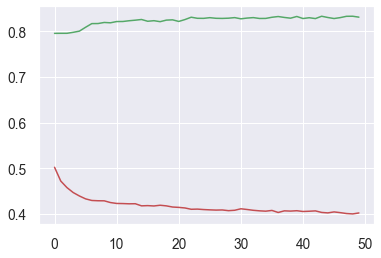

In [45]:
plt.plot(train_history.history['loss'],'r')
plt.plot(train_history.history['accuracy'],'g')

In [46]:
# Evaluating test data with this model and accuracy is coming to be 85.85 %
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 825us/step - loss: 0.3960 - accuracy: 0.8335


[0.3959566056728363, 0.8335000276565552]

In [47]:
X_test[:10]

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Gender_0,Gender_1,Geography_0,Geography_1,Geography_2
7054,0.838,0.270270,0.6,0.000000,0.333333,0.521961,0.000000,0.284211,0.365907,-1,-1,0,1,0,0,1
442,0.368,0.216216,0.7,0.484466,0.333333,0.350871,0.000163,0.370588,0.258108,1,1,1,0,1,0,0
3954,0.758,0.216216,0.9,0.526595,0.000000,0.527039,0.000118,0.476471,0.394560,-1,1,1,0,1,0,0
2288,0.538,0.162162,0.7,0.281904,0.000000,0.804763,0.000041,0.420000,0.375340,1,1,1,0,1,0,0
3196,0.520,0.243243,0.4,0.515908,0.333333,0.513183,0.000119,0.200000,0.287576,1,-1,0,1,1,0,0
6178,1.000,0.297297,0.4,0.390559,0.333333,0.533448,0.000087,0.180000,0.390011,-1,-1,1,0,0,1,0
8351,0.470,0.162162,0.6,0.000000,0.333333,0.688796,0.000000,0.360000,0.348376,1,1,1,0,1,0,0
5658,0.794,0.310811,0.9,0.000000,0.000000,0.162112,0.000000,0.395122,0.317911,1,-1,0,1,0,0,1
2065,0.552,0.202703,0.8,0.000000,0.333333,0.692530,0.000000,0.436364,0.335759,1,-1,0,1,1,0,0
413,0.686,0.310811,0.9,0.723248,0.666667,0.939679,0.000091,0.395122,0.286576,1,1,1,0,0,1,0


In [48]:
# Manually verifying some predictions
yp = model.predict(X_test)
yp[:10]

array([[0.14257425],
       [0.11899194],
       [0.08089146],
       [0.11415574],
       [0.14460984],
       [0.28210944],
       [0.04977569],
       [0.18613133],
       [0.05092341],
       [0.31043568]], dtype=float32)

In [49]:
y_predict=[]
for element in yp:
    if element > 0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)
# element>0.5 會編列成1 反之, 編列成0
y_predict[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [50]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [51]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1595
           1       0.71      0.30      0.42       405

    accuracy                           0.83      2000
   macro avg       0.78      0.63      0.66      2000
weighted avg       0.82      0.83      0.80      2000



Text(59.0, 0.5, 'Truth')

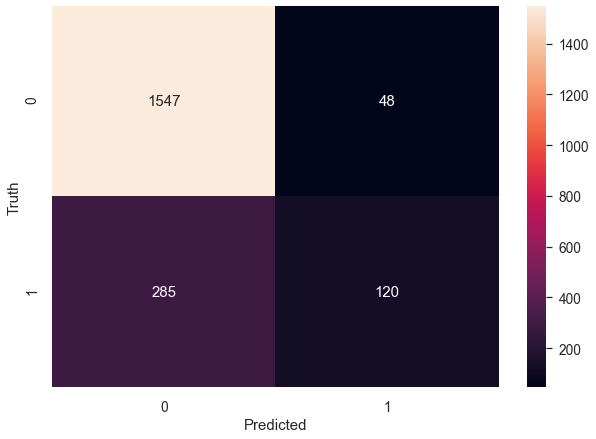

In [52]:
# confusion matrix
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predict)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
#fmt:字串格式程式碼，矩陣上標識數字的資料格式，比如保留小數點後幾位數字
plt.xlabel('Predicted')
plt.ylabel('Truth')